# Mortalidade Infântil: Extração de Conhecimento - Pré Processamento

## Tabela de Conteúdo

## Dependecias e Inicialização

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from IPython.display import display, display_png

sns.set(style="ticks", color_codes=True)
register_matplotlib_converters()


CONTEXT_MAX_ROWS_COLS = ('display.max_rows', None, 'display.max_columns', None)

%store -r

## Recursos

## Funções

# Visualização: Dados Brutos

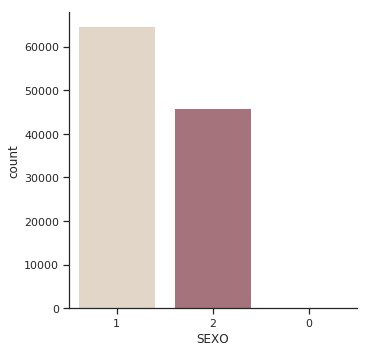

In [47]:
sns.catplot(x="SEXO", kind="count", palette="ch:.25", data=df_sim_does20122016_raw);

In [42]:
df_sim_does20122016_raw.groupby('SEXO', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,ACIDTRAB,ASSISTMED,ATESTANTE,CAUSABAS,CAUSABAS_O,CAUSAMAT,CIRCOBITO,CIRURGIA,CODESTAB,CODINST,...,FONTES,FONTESINF,NUDIASINF,NUDIASOBCO,NUMEROLOTE,STCODIFICA,TPNIVELINV,TPRESGINFO,VERSAOSCB,VERSAOSIST
98914,NaN,1,5,I64,I64,NaN,NaN,NaN,NaN,RES3205300001,...,NaN,NaN,NaN,NaN,20160030,S,NaN,NaN,3.2,3.2.00
92109,NaN,1,2,C61,C61,NaN,NaN,NaN,2465833,RES3205300001,...,NaN,NaN,NaN,NaN,20160014,S,NaN,NaN,3.2,3.2.00
72738,NaN,1,2,E149,E149,NaN,NaN,NaN,6945368,RES3205300001,...,NaN,NaN,NaN,NaN,20150021,S,NaN,NaN,3.2,3.2.00
55132,NaN,9,1,I110,I110,NaN,NaN,NaN,NaN,RES3205300001,...,NaN,XXXXXXX,NaN,NaN,20140024,S,NaN,NaN,3.2,3.2.00
32308,NaN,9,1,P369,P369,NaN,NaN,NaN,2547821,RES3205300001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59894,NaN,2,3,R99,R99,NaN,NaN,NaN,NaN,MES3205200001,...,NaN,XXXXXXX,NaN,NaN,20150021,S,NaN,NaN,3.2,3.2.00


In [ ]:
df_sim_does20122016_raw.sample(n=N, weights='SEXO', random_state=1).reset_index(drop=True)

## Historiogramas

In [41]:
sns.pairplot(df_sim_does20122016_raw);

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f829414aae8> (for post_execute):


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 12240x12240 with 3144 Axes>

# Limpeza de dados

## Perguntas

### Quais critérios serão utilizados para remover as colunas do conjutos de dados `df_sim_does20122016_raw`?

#### Colunas que não são necessárias

- `Unnamed: 0` é uma coluna que foi adicionada de forma errada durante a conversão de dados de `DBF` par `CSV`

In [94]:
pf_sim_does20122016_raw_cols_excluded = ['Unnamed: 0']

#### Taxa de ausência maior que 20%

In [95]:
COND_MISSING_P_GT = 0.2

pf_sim_does20122016_raw_cols_missing = list(pf_sim_does20122016_raw_vars[pf_sim_does20122016_raw_vars['p_missing'] \
                                                                         > COND_MISSING_P_GT].index)
display(pf_sim_does20122016_raw_cols_missing)

['ACIDTRAB',
 'ALTCAUSA',
 'ATESTADO',
 'CAUSAMAT',
 'CB_PRE',
 'CIRCOBITO',
 'CIRURGIA',
 'CODCART',
 'CODESTAB',
 'CODIFICADO',
 'CODMUNCART',
 'CODMUNNATU',
 'COMUNSVOIM',
 'CRM',
 'DTCADINF',
 'DTCADINV',
 'DTCONCASO',
 'DTCONINV',
 'DTINVESTIG',
 'DTRECORIG',
 'DTREGCART',
 'ESC2010',
 'ESCFALAGR1',
 'ESCMAE',
 'ESCMAE2010',
 'ESCMAEAGR1',
 'ESTABDESCR',
 'EXAME',
 'FONTE',
 'FONTEINV',
 'FONTES',
 'FONTESINF',
 'GESTACAO',
 'GRAVIDEZ',
 'IDADEMAE',
 'LINHAC',
 'LINHAD',
 'LINHAII',
 'MORTEPARTO',
 'NATURAL',
 'NUDIASINF',
 'NUDIASOBCO',
 'NUDIASOBIN',
 'NUMERODN',
 'NUMEROLOTE',
 'NUMREGCART',
 'NUMSUS',
 'OBITOGRAV',
 'OBITOPARTO',
 'OBITOPUERP',
 'OCUP',
 'OCUPMAE',
 'PARTO',
 'PESO',
 'QTDFILMORT',
 'QTDFILVIVO',
 'SEMAGESTAC',
 'SERIESCFAL',
 'SERIESCMAE',
 'STCODIFICA',
 'TPMORTEOCO',
 'TPNIVELINV',
 'TPOBITOCOR',
 'TPRESGINFO',
 'VERSAOSCB',
 'VERSAOSIST']

#### Valores constantes

In [96]:
pf_sim_does20122016_raw_cols_const = list(pf_sim_does20122016_raw_vars[pf_sim_does20122016_raw_vars['type'] \
                                                                       == 'CONST'].index)

display(pf_sim_does20122016_raw_cols_const)

['CAUSAMAT', 'CB_PRE', 'TIPOBITO']

## Remoção de colunas

In [97]:
df_sim_does20122016_raw_cols_drop = pf_sim_does20122016_raw_cols_excluded + \
                                    pf_sim_does20122016_raw_cols_missing + \
                                    pf_sim_does20122016_raw_cols_const

df_sim_does20122016_v1 = df_sim_does20122016_raw.drop(columns=df_sim_does20122016_raw_cols_drop)
with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sim_does20122016_v1.head())

,ASSISTMED,ATESTANTE,CAUSABAS,CAUSABAS_O,CODINST,CODMUNOCOR,CODMUNRES,DIFDATA,DTATESTADO,DTCADASTRO,DTNASC,DTOBITO,DTRECEBIM,DTRECORIGA,ESC,ESTCIV,HORAOBITO,IDADE,LINHAA,LINHAB,LOCOCOR,NECROPSIA,NUMERODO,NUMERODV,ORIGEM,RACACOR,SEXO,STDOEPIDEM,STDONOVA,TPPOS
0,1,5,I10,I10,MES3205200001,320520,320520,69.0,2012-03-08,2012-04-26,1935-01-10,2012-03-08,2012-05-16,2012-05-16,4,1,1930.0,477.0,*R092,*I10X,3,NaN,04282305,NaN,1,1,1,0.0,0.0,N
1,9,2,N390,N390,MES3205300001,320530,320530,57.0,2012-02-23,2012-03-13,1939-08-03,2012-02-23,2012-04-20,2012-04-20,4,9,850.0,472.0,*R688,*A419,3,9,06366366,NaN,1,1,2,0.0,0.0,N
2,1,1,I132,I132,MES3205200001,320520,320520,59.0,2012-01-25,2012-03-14,1931-10-25,2012-01-24,2012-03-23,2012-03-23,1,2,2040.0,480.0,*I500,*I351,3,2,07154314,NaN,1,1,1,0.0,0.0,N
3,1,1,I219,I219,MES3205200001,320520,320520,60.0,2012-01-23,2012-03-14,1921-03-03,2012-01-23,2012-03-23,2012-03-23,3,1,1300.0,490.0,*I219,*J969,3,2,07473127,NaN,1,1,2,0.0,0.0,N
4,9,1,J440,J440,MES3205300001,320530,320510,59.0,2012-08-13,2012-09-18,1935-04-19,2012-08-13,2012-10-11,2012-10-11,1,2,900.0,477.0,*J969,*J189,2,9,09947827,NaN,1,1,1,0.0,0.0,N
